In [1]:
#DATASETS PREPROCESSING AND ANALYSIS

import pandas as pd

pd.set_option('display.max_rows', None)  # Show all rows for "variable understanding" part of the project
pd.set_option('display.max_columns', None)  # Show all columns for "variable understanding" part of the project

#Specifing path to Excel file
excel_file_path = '-'

#Load SCADA dataset file into a pandas DataFrame
df_SCADA = pd.read_excel(excel_file_path)

#Output total count of values and unique count for each variable
df_SCADAColumnAnalysis = pd.DataFrame({"columns": df_SCADA.columns,
                                 "data Type": df_SCADA.dtypes.values,
                                 "Total Count": df_SCADA.count().values,
                                 "Unique Count": df_SCADA.nunique().values
                                })
df_SCADAColumnAnalysis

columns data Type  Total Count  Unique Count
0                    Turbine_ID    object       209236             4
1                     Timestamp    object       209236         52409
2                   Gen_RPM_Max   float64       209236         10375
3                   Gen_RPM_Min   float64       209236          9160
4                   Gen_RPM_Avg   float64       209236         15053
5                   Gen_RPM_Std   float64       209236          5682
6             Gen_Bear_Temp_Avg   float64       209232            80
7           Gen_Phase1_Temp_Avg     int64       209236           132
8           Gen_Phase2_Temp_Avg     int64       209236           125
9           Gen_Phase3_Temp_Avg     int64       209236           122
10             Hyd_Oil_Temp_Avg     int64       209236            36
11            Gear_Oil_Temp_Avg     int64       209236            42
12           Gear_Bear_Temp_Avg     int64       209236            51
13                 Nac_Temp_Avg     int64       209236            36
14                  Rtr_RPM_Max   float64       209236           170
15                  Rtr_RPM_Min   float64       209236           149
16                  Rtr_RPM_Avg   float64       209236           150
17            Amb_WindSpeed_Max   float64       209236           481
18            Amb_WindSpeed_Min   float64       209236           106
19            Amb_WindSpeed_Avg   float64       209236           253
20            Amb_WindSpeed_Std   float64       209236            68
21     Amb_WindDir_Relative_Avg   float64       209236          3552
22          Amb_WindDir_Abs_Avg   float64       209236          3591
23                 Amb_Temp_Avg     int64       209236            37
24    Prod_LatestAvg_ActPwrGen0     int64       209236          3952
25    Prod_LatestAvg_ActPwrGen1   float64       209236        107941
26    Prod_LatestAvg_ActPwrGen2     int64       209236             1
27     Prod_LatestAvg_TotActPwr   float64       209236        110948
28  Prod_LatestAvg_ReactPwrGen0     int64       209236          4429
29  Prod_LatestAvg_ReactPwrGen1     int64       209236         38630
30  Prod_LatestAvg_ReactPwrGen2     int64       209236             1
31   Prod_LatestAvg_TotReactPwr     int64       209236         38580
32      HVTrafo_Phase1_Temp_Avg     int64       209236            77
33      HVTrafo_Phase2_Temp_Avg     int64       209236            88
34      HVTrafo_Phase3_Temp_Avg     int64       209236            95
35  Grd_InverterPhase1_Temp_Avg     int64       209236            31
36            Cont_Top_Temp_Avg     int64       209236            39
37            Cont_Hub_Temp_Avg     int64       209236            41
38            Cont_VCP_Temp_Avg     int64       209236            40
39        Gen_SlipRing_Temp_Avg     int64       209236            50
40                Spin_Temp_Avg     int64       209236            40
41          Blds_PitchAngle_Min   float64       209236           416
42          Blds_PitchAngle_Max   float64       209236           910
43          Blds_PitchAngle_Avg   float64       209236           814
44          Blds_PitchAngle_Std   float64       209236           438
45    Cont_VCP_ChokcoilTemp_Avg     int64       209236           122
46    Grd_RtrInvPhase1_Temp_Avg     int64       209236            33
47    Grd_RtrInvPhase2_Temp_Avg     int64       209236            33
48    Grd_RtrInvPhase3_Temp_Avg     int64       209236            35
49         Cont_VCP_WtrTemp_Avg     int64       209236            35
50             Grd_Prod_Pwr_Avg   float64       209236         20004
51          Grd_Prod_CosPhi_Avg   float64       209232             9
52            Grd_Prod_Freq_Avg   float64       209236             3
53       Grd_Prod_VoltPhse1_Avg   float64       209236           181
54       Grd_Prod_VoltPhse2_Avg   float64       209236           178
55       Grd_Prod_VoltPhse3_Avg   float64       209236           204
56        Grd_Prod_CurPhse1_Avg   float64       209236         16837
57        Grd_Prod_Cur

In [2]:
#Converting non-numerical data types to int/float because "object" dt cannot be used in regression based ml models
#Remove the 'T' prefix from the 'Turbine_ID' values
df_SCADA['Turbine_ID'] = df_SCADA['Turbine_ID'].astype(str).str.replace('T', '')

#Convert the "Turbine_ID" column to integers
df_SCADA['Turbine_ID'] = df_SCADA['Turbine_ID'].astype(int)

#Convert the "Timestamp" column to datetime format
df_SCADA['Timestamp'] = pd.to_datetime(df_SCADA['Timestamp'])

#Checking the data types to confirm changes
df_SCADA.dtypes

Turbine_ID                                   int64
Timestamp                      datetime64[ns, UTC]
Gen_RPM_Max                                float64
Gen_RPM_Min                                float64
Gen_RPM_Avg                                float64
Gen_RPM_Std                                float64
Gen_Bear_Temp_Avg                          float64
Gen_Phase1_Temp_Avg                          int64
Gen_Phase2_Temp_Avg                          int64
Gen_Phase3_Temp_Avg                          int64
Hyd_Oil_Temp_Avg                             int64
Gear_Oil_Temp_Avg                            int64
Gear_Bear_Temp_Avg                           int64
Nac_Temp_Avg                                 int64
Rtr_RPM_Max                                float64
Rtr_RPM_Min                                float64
Rtr_RPM_Avg                                float64
Amb_WindSpeed_Max                          float64
Amb_WindSpeed_Min                          float64
Amb_WindSpeed_Avg              

In [3]:
#Specifing path to Excel file
excel_file_path = '-'

#Load MetMast dataset file into a pandas DataFrame
df_MetMast = pd.read_excel(excel_file_path)

#Output total count of values and unique count for each variable
df_MetMastColumnAnalysis = pd.DataFrame({"columns": df_MetMast.columns,
                                 "data Type": df_MetMast.dtypes.values,
                                 "Total Count": df_MetMast.count().values,
                                 "Unique Count": df_MetMast.nunique().values
                                })
df_MetMastColumnAnalysis

columns data Type  Total Count  Unique Count
0                    Timestamp    object        34831         34831
1               Min_Windspeed1   float64        34830           160
2               Max_Windspeed1   float64        34831           286
3               Avg_Windspeed1   float64        34830           222
4               Var_Windspeed1   float64        34830           842
5               Min_Windspeed2   float64        34830           157
6               Max_Windspeed2   float64        34831           264
7               Avg_Windspeed2   float64        34830           213
8               Var_Windspeed2   float64        34830           595
9           Min_Winddirection2   float64        34830           360
10          Max_Winddirection2     int64        34831           360
11          Avg_Winddirection2   float64        34830           360
12          Var_Winddirection2   float64        34825          1329
13             Min_AmbientTemp   float64        34830            33
14             Max_AmbientTemp     int64        34831            33
15             Avg_AmbientTemp   float64        34830            33
16                Min_Pressure   float64        34830            39
17                Max_Pressure     int64        34831            39
18                Avg_Pressure   float64        34830            40
19                Min_Humidity     int64        34831            90
20                Max_Humidity     int64        34831            89
21                Avg_Humidity     int64        34831            89
22           Min_Precipitation     int64        34831            19
23           Max_Precipitation     int64        34831            28
24           Avg_Precipitation     int64        34831            31
25           Min_Raindetection     int64        34831             1
26           Max_Raindetection     int64        34831             2
27           Avg_Raindetection     int64        34831             1
28            Anemometer1_Freq   float64        34831             1
29          Anemometer1_Offset   float64        34831             1
30        Anemometer1_CorrGain     int64        34831             1
31      Anemometer1_CorrOffset     int64        34831             1
32            Anemometer2_Freq   float64        34831             1
33          Anemometer2_Offset   float64        34831             1
34        Anemometer2_CorrGain     int64        34831             1
35      Anemometer2_CorrOffset     int64        34831             1
36            DistanceAirPress     int64        34831             1
37  AirRessureSensorZeroOffset     int64        34831             1
38        Anemometer1_Avg_Freq     int64        34831           421
39        Anemometer2_Avg_Freq     int64        34831           404
40           Pressure_Avg_Freq     int64        34831            39

In [4]:
#Convert the 'Timestamp' column to datetime format because "object" dt
#cannot be used in regression based ml models
df_MetMast['Timestamp'] = pd.to_datetime(df_MetMast['Timestamp'])

#Check the data types to confirm changes
df_MetMast.dtypes

Timestamp                     datetime64[ns, UTC]
Min_Windspeed1                            float64
Max_Windspeed1                            float64
Avg_Windspeed1                            float64
Var_Windspeed1                            float64
Min_Windspeed2                            float64
Max_Windspeed2                            float64
Avg_Windspeed2                            float64
Var_Windspeed2                            float64
Min_Winddirection2                        float64
Max_Winddirection2                          int64
Avg_Winddirection2                        float64
Var_Winddirection2                        float64
Min_AmbientTemp                           float64
Max_AmbientTemp                             int64
Avg_AmbientTemp                           float64
Min_Pressure                              float64
Max_Pressure                                int64
Avg_Pressure                              float64
Min_Humidity                                int64


SCADA Dataset:
Minimum Recorded Time: 2017-01-01 00:00:00+00:00
Maximum Recorded Time: 2017-12-31 23:50:00+00:00
Common Frequency: 0 days 00:10:00
                                 min                       max
Turbine_ID                                                    
1          2017-01-01 00:00:00+00:00 2017-12-31 23:50:00+00:00
6          2017-01-01 00:00:00+00:00 2017-12-31 23:50:00+00:00
7          2017-01-01 00:00:00+00:00 2017-12-31 23:50:00+00:00
11         2017-01-01 00:00:00+00:00 2017-12-31 23:50:00+00:00
Descriptive Statistics for Time Differences - SCADA:
count    2.092350e+05
mean    -1.309312e+02
std      1.065056e+07
min     -3.128460e+07
25%     -4.353300e+06
50%      6.000000e+02
75%      4.368600e+06
max      3.128820e+07
Name: Time_Diff, dtype: float64


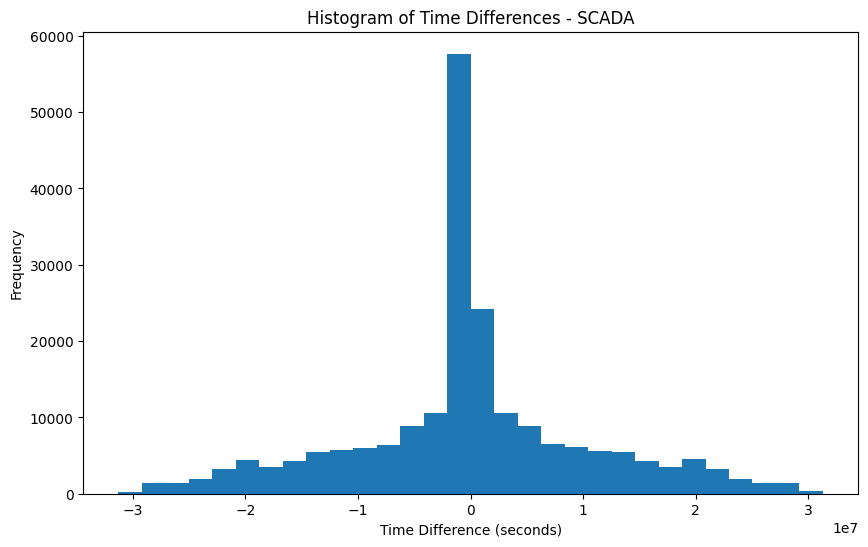

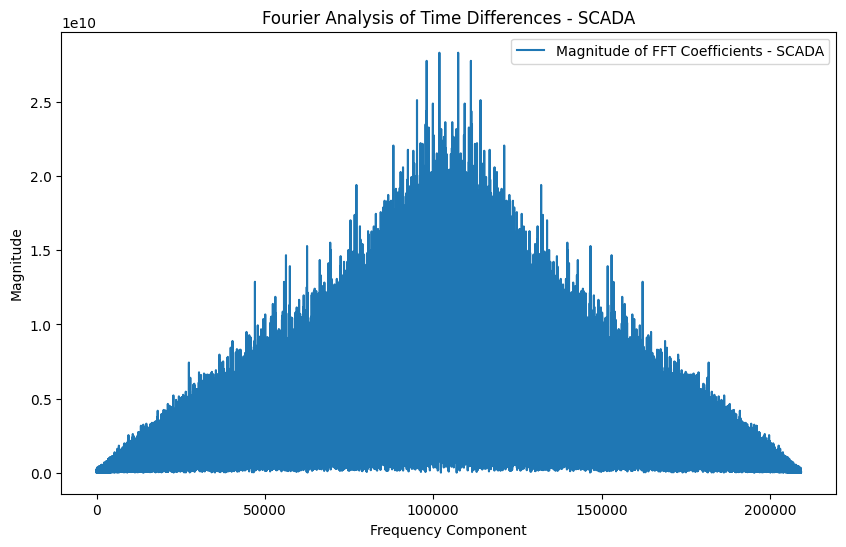


MetMast Dataset:
Minimum Recorded Time: 2017-01-01 00:00:00+00:00
Maximum Recorded Time: 2017-12-31 23:50:00+00:00
Common Frequency: 0 days 00:10:00
Descriptive Statistics for Time Differences - MetMast:
count    3.483000e+04
mean    -4.461671e+02
std      7.112027e+06
min     -3.138480e+07
25%     -1.351500e+06
50%      2.400000e+03
75%      1.258650e+06
max      3.139980e+07
Name: Time_Diff, dtype: float64


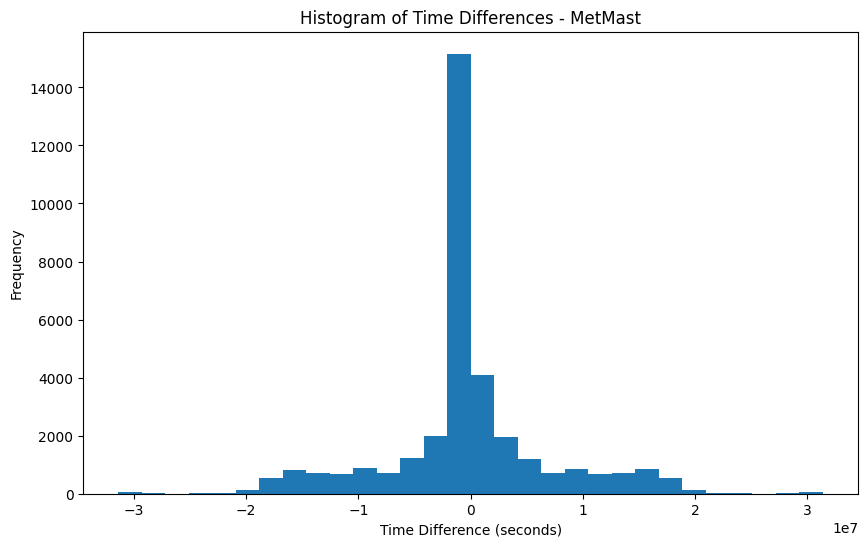

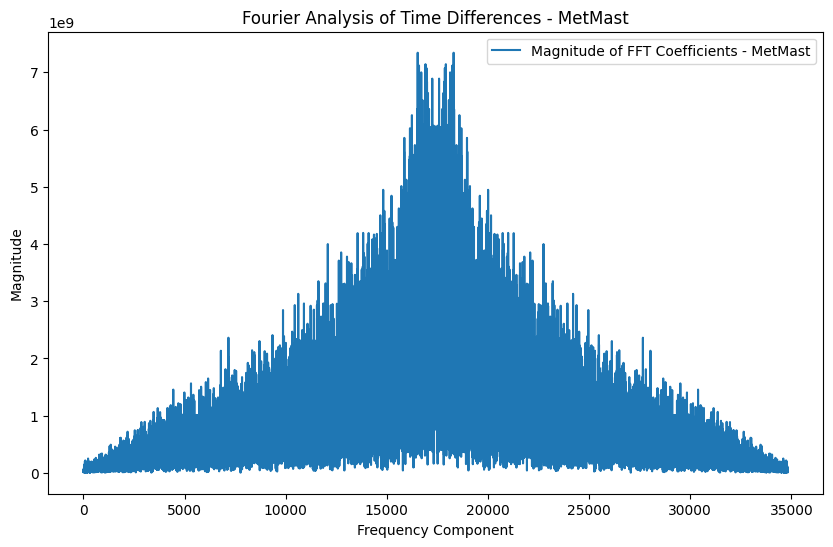

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from pandas.plotting import autocorrelation_plot

# Assuming df_SCADA and df_MetMast are already loaded and need fixing of the Timestamp data type
# Convert Timestamp columns to datetime if they are not already

# Exploring time frequency for df_SCADA and df_MetMast dataset

# For df_SCADA
scada_min_time = df_SCADA['Timestamp'].min()
scada_max_time = df_SCADA['Timestamp'].max()
scada_time_diff = df_SCADA['Timestamp'].diff().dropna()  # Calculate differences between consecutive timestamps and drop the first NaN value

# Print results
print("SCADA Dataset:")
print(f"Minimum Recorded Time: {scada_min_time}")
print(f"Maximum Recorded Time: {scada_max_time}")
print(f"Common Frequency: {scada_time_diff.mode()[0]}")  # mode() finds the most common timedelta

#Get the earliest and latest 'Timestamp' for each Turbine ID
timestamp_range = df_SCADA.groupby('Turbine_ID')['Timestamp'].agg(['min', 'max'])

# The result is a DataFrame with the oldest and most recent 'Timestamp' for each 'Turbine_ID'
print(timestamp_range)

# Process for df_SCADA
df_SCADA['Time_Diff'] = df_SCADA['Timestamp'].diff().dt.total_seconds().dropna()

# Descriptive Statistics for df_SCADA
print("Descriptive Statistics for Time Differences - SCADA:")
print(df_SCADA['Time_Diff'].describe())

# Histogram Analysis for df_SCADA
plt.figure(figsize=(10, 6))
df_SCADA['Time_Diff'].plot(kind='hist', bins=30, title='Histogram of Time Differences - SCADA')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()

# Fourier Analysis for df_SCADA
fft_values_scada = fft(df_SCADA['Time_Diff'].dropna().values)
frequencies_scada = np.abs(fft_values_scada)
plt.figure(figsize=(10, 6))
plt.plot(frequencies_scada, label='Magnitude of FFT Coefficients - SCADA')
plt.title('Fourier Analysis of Time Differences - SCADA')
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

# For df_MetMast
metmast_min_time = df_MetMast['Timestamp'].min()
metmast_max_time = df_MetMast['Timestamp'].max()
metmast_time_diff = df_MetMast['Timestamp'].diff().dropna()

print("\nMetMast Dataset:")
print(f"Minimum Recorded Time: {metmast_min_time}")
print(f"Maximum Recorded Time: {metmast_max_time}")
print(f"Common Frequency: {metmast_time_diff.mode()[0]}")

# Same process for df_MetMast
df_MetMast['Time_Diff'] = df_MetMast['Timestamp'].diff().dt.total_seconds().dropna()

# Descriptive Statistics for df_MetMast
print("Descriptive Statistics for Time Differences - MetMast:")
print(df_MetMast['Time_Diff'].describe())

# Histogram Analysis for df_MetMast
plt.figure(figsize=(10, 6))
df_MetMast['Time_Diff'].plot(kind='hist', bins=30, title='Histogram of Time Differences - MetMast')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()

# Fourier Analysis for df_MetMast
fft_values_metmast = fft(df_MetMast['Time_Diff'].dropna().values)
frequencies_metmast = np.abs(fft_values_metmast)
plt.figure(figsize=(10, 6))
plt.plot(frequencies_metmast, label='Magnitude of FFT Coefficients - MetMast')
plt.title('Fourier Analysis of Time Differences - MetMast')
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


In [6]:
#Merging
#Outer join is performed to ensure no data is lost from either dataset.
#Since there are multiple turbines per timestamp in the SCADA data, each turbine entry is 
#matched with the corresponding MetMast entry
df_merged = pd.merge(df_SCADA, df_MetMast, on='Timestamp', how='outer', suffixes=('', '_MetMast'))

#Output total count of values and unique count for each variable for merged dataset
df_mergedColumnAnalysis = pd.DataFrame({"columns": df_merged.columns,
                                 "data Type": df_merged.dtypes.values,
                                 "Total Count": df_merged.count().values,
                                 "Unique Count": df_merged.nunique().values
                                })
df_mergedColumnAnalysis

columns            data Type  Total Count  \
0                     Turbine_ID              float64       209236   
1                      Timestamp  datetime64[ns, UTC]       209381   
2                    Gen_RPM_Max              float64       209236   
3                    Gen_RPM_Min              float64       209236   
4                    Gen_RPM_Avg              float64       209236   
5                    Gen_RPM_Std              float64       209236   
6              Gen_Bear_Temp_Avg              float64       209232   
7            Gen_Phase1_Temp_Avg              float64       209236   
8            Gen_Phase2_Temp_Avg              float64       209236   
9            Gen_Phase3_Temp_Avg              float64       209236   
10              Hyd_Oil_Temp_Avg              float64       209236   
11             Gear_Oil_Temp_Avg              float64       209236   
12            Gear_Bear_Temp_Avg              float64       209236   
13                  Nac_Temp_Avg              float64       209236   
14                   Rtr_RPM_Max              float64       209236   
15                   Rtr_RPM_Min              float64       209236   
16                   Rtr_RPM_Avg              float64       209236   
17             Amb_WindSpeed_Max              float64       209236   
18             Amb_WindSpeed_Min              float64       209236   
19             Amb_WindSpeed_Avg              float64       209236   
20             Amb_WindSpeed_Std              float64       209236   
21      Amb_WindDir_Relative_Avg              float64       209236   
22           Amb_WindDir_Abs_Avg              float64       209236   
23                  Amb_Temp_Avg              float64       209236   
24     Prod_LatestAvg_ActPwrGen0              float64       209236   
25     Prod_LatestAvg_ActPwrGen1              float64       209236   
26     Prod_LatestAvg_ActPwrGen2              float64       209236   
27      Prod_LatestAvg_TotActPwr              float64       209236   
28   Prod_LatestAvg_ReactPwrGen0              float64       209236   
29   Prod_LatestAvg_ReactPwrGen1              float64       209236   
30   Prod_LatestAvg_ReactPwrGen2              float64       209236   
31    Prod_LatestAvg_TotReactPwr              float64       209236   
32       HVTrafo_Phase1_Temp_Avg              float64       209236   
33       HVTrafo_Phase2_Temp_Avg              float64       209236   
34       HVTrafo_Phase3_Temp_Avg              float64       209236   
35   Grd_InverterPhase1_Temp_Avg              float64       209236   
36             Cont_Top_Temp_Avg              float64       209236   
37             Cont_Hub_Temp_Avg              float64       209236   
38             Cont_VCP_Temp_Avg              float64       209236   
39         Gen_SlipRing_Temp_Avg              float64       209236   
40                 Spin_Temp_Avg              float64       209236   
41           Blds_PitchAngle_Min              float64       209236   
42           Blds_PitchAngle_Max              float64       209236   
43           Blds_PitchAngle_Avg              float64       209236   
44           Blds_PitchAngle_Std              float64       209236   
45     Cont_VCP_ChokcoilTemp_Avg              float64       209236   
46     Grd_RtrInvPhase1_Temp_Avg              float64       209236   
47     Grd_RtrInvPhase2_Temp_Avg              float64       209236   
48     Grd_RtrInvPhase3_Temp_Avg              float64       209236   
49          Cont_VCP_WtrTemp_Avg              float64       209236   
50              Grd_Prod_Pwr_Avg              float64       209236   
51           Grd_Prod_CosPhi_Avg              float64       209232   
52             Grd_Prod_Freq_Avg              float64       209236   
53        Grd_Prod_VoltPhse1_Avg              float64       209236   
54        Grd_Prod_VoltPhse2_Avg              float64       209236   
55        Grd_Prod_VoltPhse3_Avg              float64       209236   
56         Grd_Prod_CurPhse1_Avg   

In [7]:
#Datasets merged with different number of "Total Count" for columns => have to find out why
#Check entire df for null values
ContainsNullValues = df_merged.isnull().values.any() 
print("does dataset contain null values: ", ContainsNullValues)
if ContainsNullValues:
    print("null values found in columns: \n", df_merged.isnull().sum())

does dataset contain null values:  True
null values found in columns: 
 Turbine_ID                       145
Timestamp                          0
Gen_RPM_Max                      145
Gen_RPM_Min                      145
Gen_RPM_Avg                      145
Gen_RPM_Std                      145
Gen_Bear_Temp_Avg                149
Gen_Phase1_Temp_Avg              145
Gen_Phase2_Temp_Avg              145
Gen_Phase3_Temp_Avg              145
Hyd_Oil_Temp_Avg                 145
Gear_Oil_Temp_Avg                145
Gear_Bear_Temp_Avg               145
Nac_Temp_Avg                     145
Rtr_RPM_Max                      145
Rtr_RPM_Min                      145
Rtr_RPM_Avg                      145
Amb_WindSpeed_Max                145
Amb_WindSpeed_Min                145
Amb_WindSpeed_Avg                145
Amb_WindSpeed_Std                145
Amb_WindDir_Relative_Avg         145
Amb_WindDir_Abs_Avg              145
Amb_Temp_Avg                     145
Prod_LatestAvg_ActPwrGen0        145
Pro

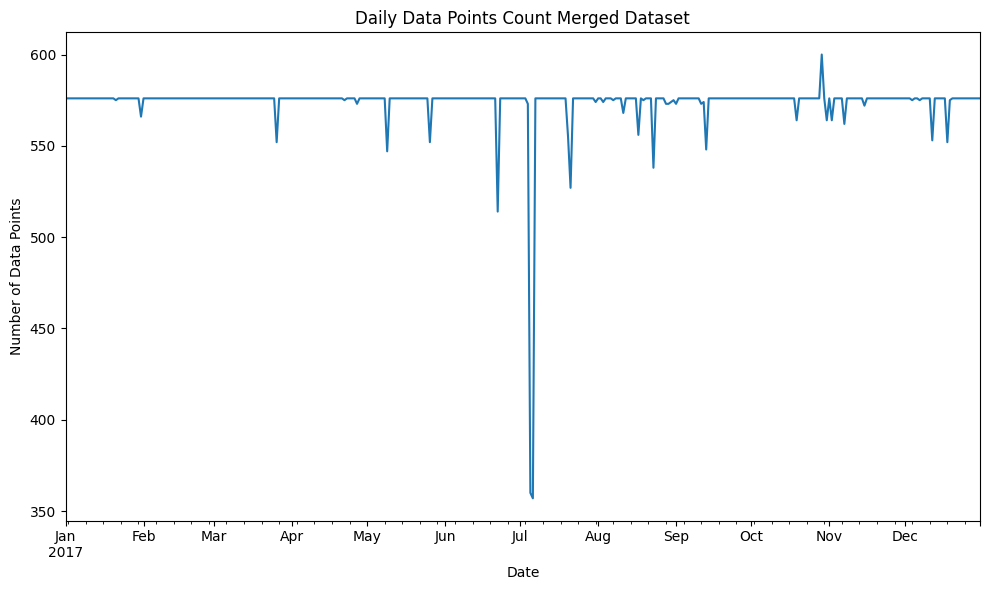

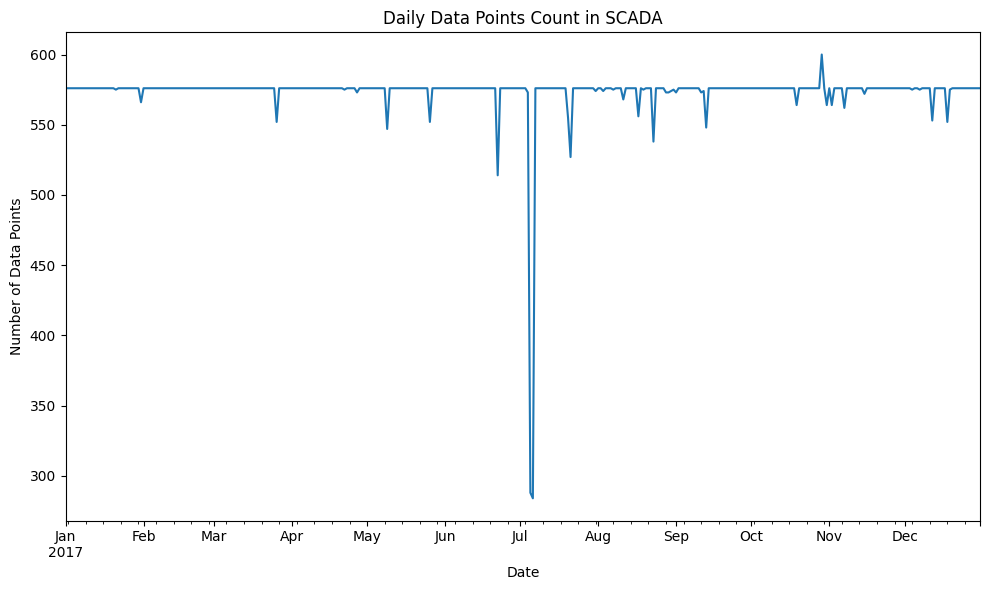

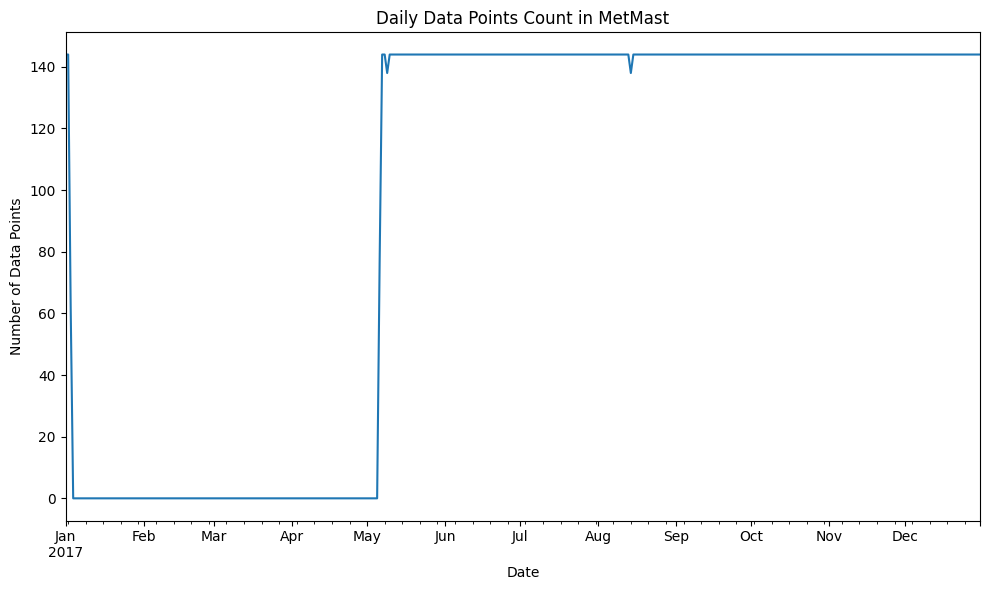

In [10]:
#Checking count of records per day for merged dataset and making a plot
daily_counts = df_merged.set_index('Timestamp').resample('D').size()

plt.figure(figsize=(10, 6))

daily_counts.plot()
plt.title('Daily Data Points Count Merged Dataset')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')

plt.tight_layout()
plt.show()

#Count of records per day for SCADA dataset and a plot

daily_counts = df_SCADA.set_index('Timestamp').resample('D').size()

plt.figure(figsize=(10, 6))

daily_counts.plot()
plt.title('Daily Data Points Count in SCADA')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')

plt.tight_layout()
plt.show()

#Count of records per day for MetMast dataset and a plot
daily_counts = df_MetMast.set_index('Timestamp').resample('D').size()

plt.figure(figsize=(10, 6))

daily_counts.plot()
plt.title('Daily Data Points Count in MetMast')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')

plt.tight_layout()
plt.show()


In [11]:
#Dropping rows with null values in merged dataset where data hasn't been recorded
df_merged = df_merged.dropna()

ContainsNullValues = df_merged.isnull().values.any() 
print("does dataset contain null values: ", ContainsNullValues)
if ContainsNullValues:
    print("null values found in columns: \n", df_merged.isnull().sum())

does dataset contain null values:  False


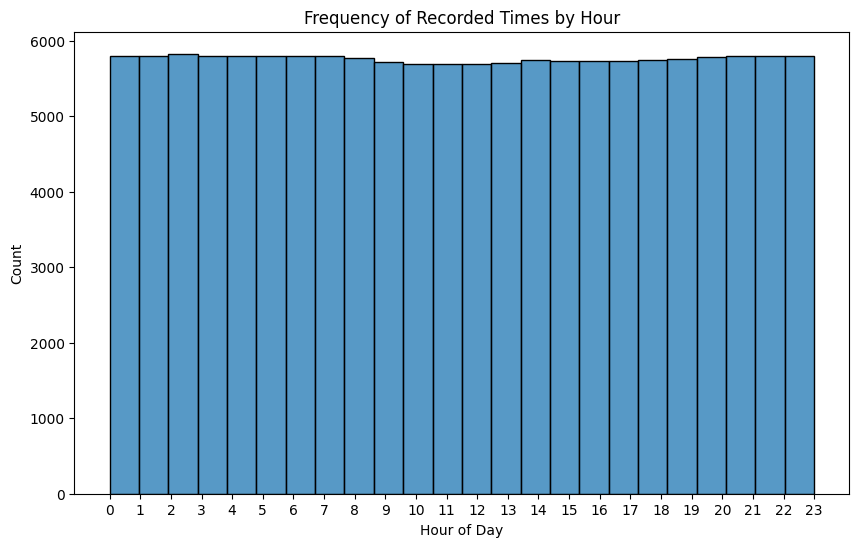

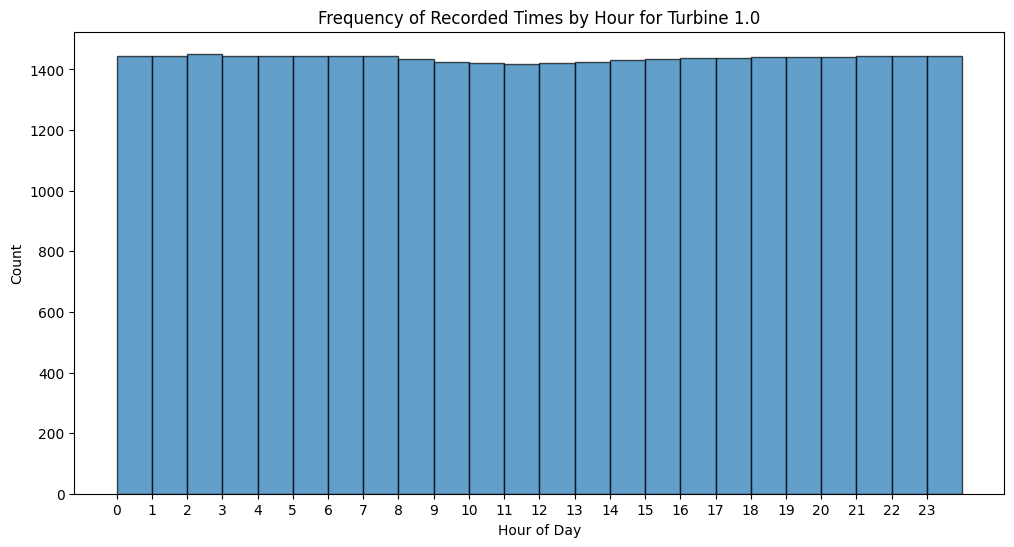

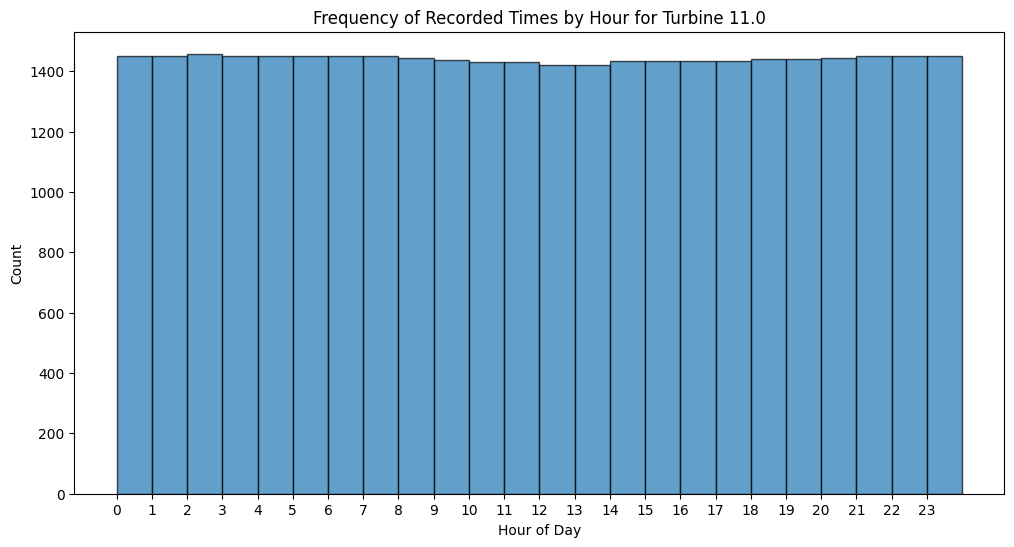

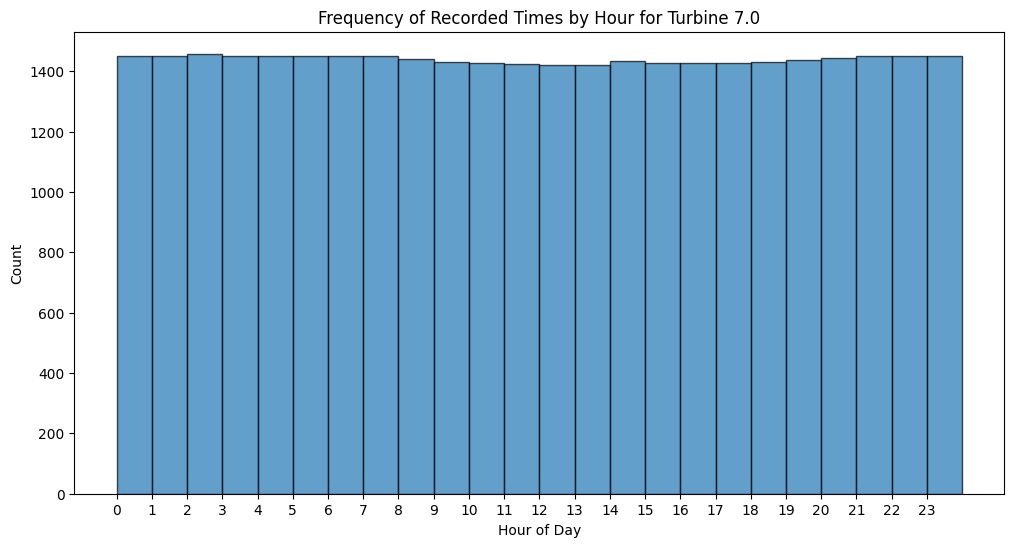

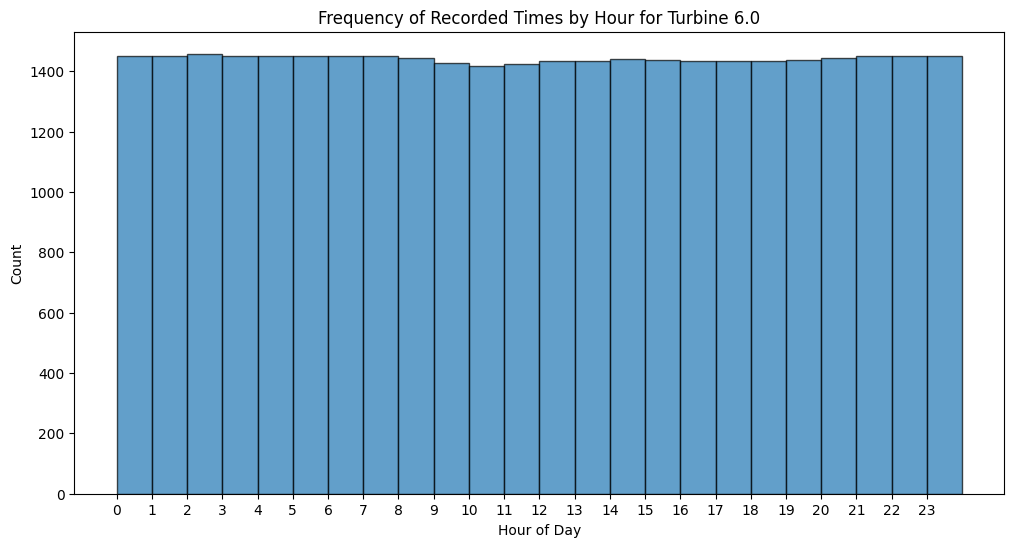

In [13]:
import seaborn as sns

#Extracting the hour from the 'Timestamp' for frequency analysis in merged dataset
df_merged['Hour'] = df_merged['Timestamp'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Hour'], bins=24, kde=False)
plt.title('Frequency of Recorded Times by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(24))  # To show every hour on the x-axis

plt.show()

#Unique turbine IDs
turbine_ids = df_merged['Turbine_ID'].unique()

#Plotting the frequency distribution of times for each turbine
for turbine_id in turbine_ids:
    
    df_turbine = df_merged[df_merged['Turbine_ID'] == turbine_id]
    
    plt.figure(figsize=(12, 6))
    df_turbine['Hour'].hist(bins=24, range=(0,24), alpha=0.7, edgecolor='black')

    plt.title(f'Frequency of Recorded Times by Hour for Turbine {turbine_id}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Count')
    plt.xticks(range(24))  
    plt.grid(False)  
    plt.show()



Merged Dataset:
Minimum Recorded Time: 2017-01-01 00:00:00+00:00
Maximum Recorded Time: 2017-12-31 23:50:00+00:00
Common Frequency: 0 days 00:00:00
Descriptive Statistics for Time Differences - Merged Dataset:
count    1.383310e+05
mean    -7.872422e+00
std      2.944499e+06
min     -3.124920e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.123240e+07
Name: Time_Diff, dtype: float64


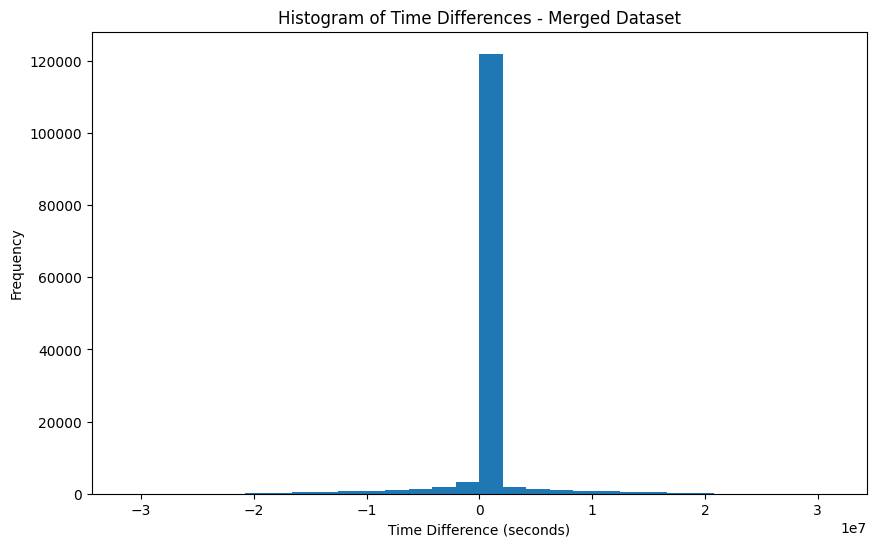

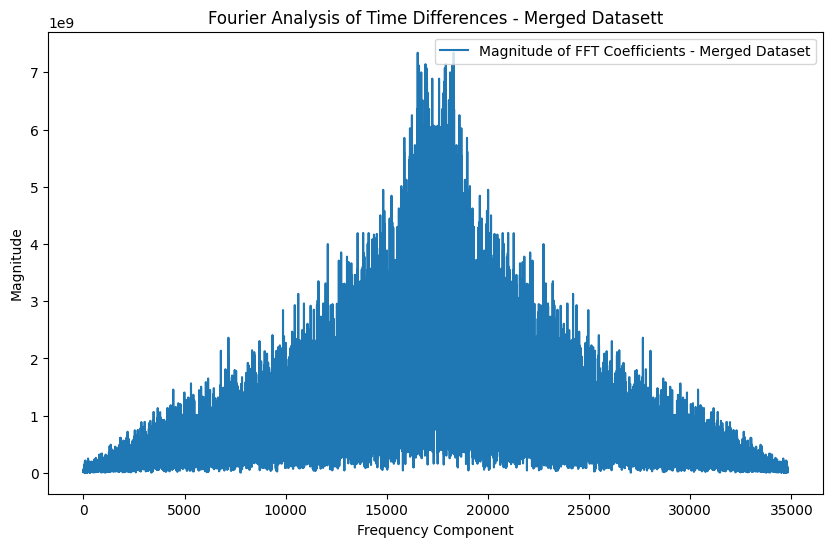

In [14]:
#Time frequency analysis for df_merged
merged_min_time = df_merged['Timestamp'].min()
merged_max_time = df_merged['Timestamp'].max()
merged_time_diff = df_merged['Timestamp'].diff().dropna()

print("\nMerged Dataset:")
print(f"Minimum Recorded Time: {merged_min_time}")
print(f"Maximum Recorded Time: {merged_max_time}")
print(f"Common Frequency: {merged_time_diff.mode()[0]}")

df_merged['Time_Diff'] = df_merged['Timestamp'].diff().dt.total_seconds().dropna()

#Descriptive Statistics for df_merged
print("Descriptive Statistics for Time Differences - Merged Dataset:")
print(df_merged['Time_Diff'].describe())

#Histogram Analysis for df_merged
plt.figure(figsize=(10, 6))
df_merged['Time_Diff'].plot(kind='hist', bins=30, title='Histogram of Time Differences - Merged Dataset')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()

#Fourier Analysis for the merged dataset
fft_values_merged = fft(df_merged['Time_Diff'].dropna().values)
frequencies_merged = np.abs(fft_values_metmast)
plt.figure(figsize=(10, 6))
plt.plot(frequencies_merged, label='Magnitude of FFT Coefficients - Merged Dataset')
plt.title('Fourier Analysis of Time Differences - Merged Datasett')
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

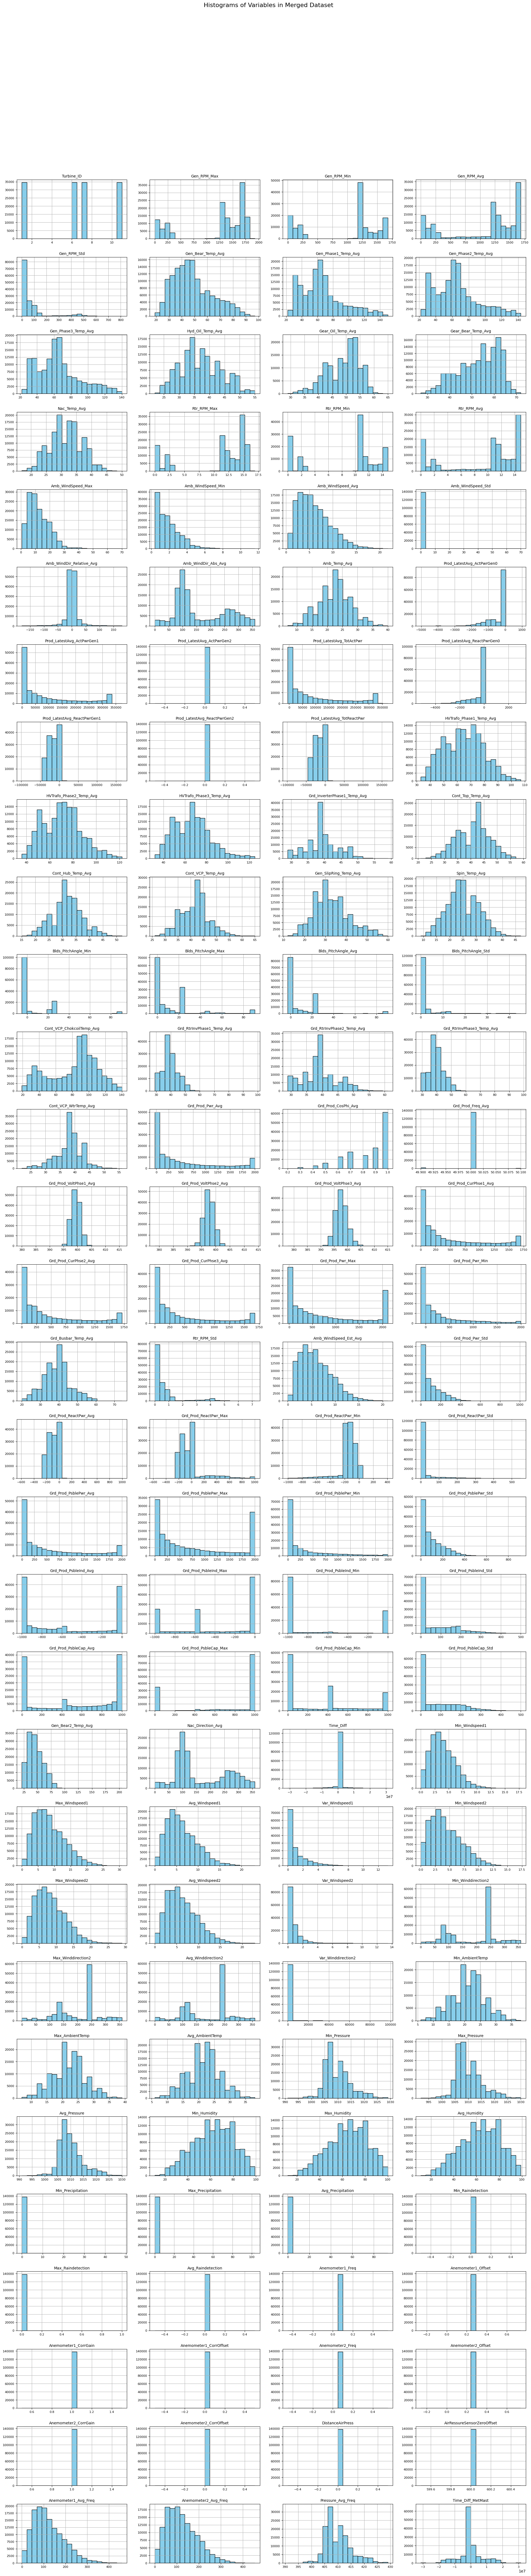

In [15]:
#Automatically selecting numeric variables for plotting
variables = df_merged.select_dtypes(include=['float64', 'int64']).columns

#Determine the grid size for plotting because of a large number of variables
n_vars = len(variables)
ncols = 4  
nrows = (n_vars + ncols - 1) // ncols  

#Figure to hold subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*3))
fig.tight_layout(pad=3.0)

#Flatten the axes array for easier iteration when handling multi-dimensional data
axes = axes.flatten()

#Plot each variable
for i, var in enumerate(variables):
    ax = axes[i]
    df_merged[var].dropna().hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(var, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Hide any unused subplot areas
for j in range(i+1, nrows*ncols):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.95)
plt.suptitle('Histograms of Variables in Merged Dataset', fontsize=16, y=1.02)
plt.show()


In [16]:
#Check entire dataset for null values:
ContainsNullValues = df_merged.isnull().values.any() 
print("does dataset contain null values: ", ContainsNullValues)
if ContainsNullValues:
    print("null values found in columns: \n", df_merged.isnull().sum())

does dataset contain null values:  True
null values found in columns: 
 Turbine_ID                     0
Timestamp                      0
Gen_RPM_Max                    0
Gen_RPM_Min                    0
Gen_RPM_Avg                    0
Gen_RPM_Std                    0
Gen_Bear_Temp_Avg              0
Gen_Phase1_Temp_Avg            0
Gen_Phase2_Temp_Avg            0
Gen_Phase3_Temp_Avg            0
Hyd_Oil_Temp_Avg               0
Gear_Oil_Temp_Avg              0
Gear_Bear_Temp_Avg             0
Nac_Temp_Avg                   0
Rtr_RPM_Max                    0
Rtr_RPM_Min                    0
Rtr_RPM_Avg                    0
Amb_WindSpeed_Max              0
Amb_WindSpeed_Min              0
Amb_WindSpeed_Avg              0
Amb_WindSpeed_Std              0
Amb_WindDir_Relative_Avg       0
Amb_WindDir_Abs_Avg            0
Amb_Temp_Avg                   0
Prod_LatestAvg_ActPwrGen0      0
Prod_LatestAvg_ActPwrGen1      0
Prod_LatestAvg_ActPwrGen2      0
Prod_LatestAvg_TotActPwr       0
Prod

In [17]:
df_merged = df_merged.drop('Time_Diff', axis=1)

In [18]:
from sklearn.ensemble import IsolationForest

#Select numerical features excluding 'Turbine_ID' and 'Timestamp'
features = df_merged.drop(['Turbine_ID', 'Timestamp'], axis=1)

#Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

#Fit the model on the selected features
iso_forest.fit(features)

#Predict the outliers (-1 for outliers, 1 for inliers)
outliers = iso_forest.predict(features)

#Add the outliers predictions as a new column named 'Anomaly'
df_merged['Anomaly'] = outliers

#Output how many anomalies were detected
print(df_merged['Anomaly'].value_counts())

print(df_merged.head())

Anomaly
 1    125246
-1     13086
Name: count, dtype: int64
   Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
1         1.0 2017-12-29 20:30:00+00:00        289.9        238.5   
2        11.0 2017-12-29 20:30:00+00:00       1259.3       1234.4   
3         7.0 2017-12-29 20:30:00+00:00       1259.9       1234.3   
4         6.0 2017-12-29 20:40:00+00:00        311.0        275.0   
5         7.0 2017-12-29 20:40:00+00:00       1255.5       1239.3   

   Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
1        265.5         13.1               40.0                 54.0   
2       1248.7          4.3               42.0                 55.0   
3       1248.4          4.3               39.0                 63.0   
4        293.1          8.9               43.0                 53.0   
5       1248.8          2.9               39.0                 63.0   

   Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
1                 54.0           

In [19]:
df_mergedColumnAnalysis = pd.DataFrame({"columns": df_merged.columns,
                                 "data Type": df_merged.dtypes.values,
                                 "Total Count": df_merged.count().values,
                                 "Unique Count": df_merged.nunique().values
                                })
df_mergedColumnAnalysis

columns            data Type  Total Count  \
0                     Turbine_ID              float64       138332   
1                      Timestamp  datetime64[ns, UTC]       138332   
2                    Gen_RPM_Max              float64       138332   
3                    Gen_RPM_Min              float64       138332   
4                    Gen_RPM_Avg              float64       138332   
5                    Gen_RPM_Std              float64       138332   
6              Gen_Bear_Temp_Avg              float64       138332   
7            Gen_Phase1_Temp_Avg              float64       138332   
8            Gen_Phase2_Temp_Avg              float64       138332   
9            Gen_Phase3_Temp_Avg              float64       138332   
10              Hyd_Oil_Temp_Avg              float64       138332   
11             Gear_Oil_Temp_Avg              float64       138332   
12            Gear_Bear_Temp_Avg              float64       138332   
13                  Nac_Temp_Avg              float64       138332   
14                   Rtr_RPM_Max              float64       138332   
15                   Rtr_RPM_Min              float64       138332   
16                   Rtr_RPM_Avg              float64       138332   
17             Amb_WindSpeed_Max              float64       138332   
18             Amb_WindSpeed_Min              float64       138332   
19             Amb_WindSpeed_Avg              float64       138332   
20             Amb_WindSpeed_Std              float64       138332   
21      Amb_WindDir_Relative_Avg              float64       138332   
22           Amb_WindDir_Abs_Avg              float64       138332   
23                  Amb_Temp_Avg              float64       138332   
24     Prod_LatestAvg_ActPwrGen0              float64       138332   
25     Prod_LatestAvg_ActPwrGen1              float64       138332   
26     Prod_LatestAvg_ActPwrGen2              float64       138332   
27      Prod_LatestAvg_TotActPwr              float64       138332   
28   Prod_LatestAvg_ReactPwrGen0              float64       138332   
29   Prod_LatestAvg_ReactPwrGen1              float64       138332   
30   Prod_LatestAvg_ReactPwrGen2              float64       138332   
31    Prod_LatestAvg_TotReactPwr              float64       138332   
32       HVTrafo_Phase1_Temp_Avg              float64       138332   
33       HVTrafo_Phase2_Temp_Avg              float64       138332   
34       HVTrafo_Phase3_Temp_Avg              float64       138332   
35   Grd_InverterPhase1_Temp_Avg              float64       138332   
36             Cont_Top_Temp_Avg              float64       138332   
37             Cont_Hub_Temp_Avg              float64       138332   
38             Cont_VCP_Temp_Avg              float64       138332   
39         Gen_SlipRing_Temp_Avg              float64       138332   
40                 Spin_Temp_Avg              float64       138332   
41           Blds_PitchAngle_Min              float64       138332   
42           Blds_PitchAngle_Max              float64       138332   
43           Blds_PitchAngle_Avg              float64       138332   
44           Blds_PitchAngle_Std              float64       138332   
45     Cont_VCP_ChokcoilTemp_Avg              float64       138332   
46     Grd_RtrInvPhase1_Temp_Avg              float64       138332   
47     Grd_RtrInvPhase2_Temp_Avg              float64       138332   
48     Grd_RtrInvPhase3_Temp_Avg              float64       138332   
49          Cont_VCP_WtrTemp_Avg              float64       138332   
50              Grd_Prod_Pwr_Avg              float64       138332   
51           Grd_Prod_CosPhi_Avg              float64       138332   
52             Grd_Prod_Freq_Avg              float64       138332   
53        Grd_Prod_VoltPhse1_Avg              float64       138332   
54        Grd_Prod_VoltPhse2_Avg              float64       138332   
55        Grd_Prod_VoltPhse3_Avg              float64       138332   
56         Grd_Prod_CurPhse1_Avg   

In [20]:
#Specify path to Excel file
excel_file_path = '-'

#Load the Excel file into a pandas DataFrame
logs_df = pd.read_excel(excel_file_path)

#Convert the timestamp columns to datetime 
logs_df['Time_Detected'] = pd.to_datetime(logs_df['Time_Detected'])

logs_dfColumnAnalysis = pd.DataFrame({"columns": logs_df.columns,
                                 "data Type": logs_df.dtypes.values,
                                 "Total Count": logs_df.count().values,
                                 "Unique Count": logs_df.nunique().values
                                })
logs_dfColumnAnalysis

columns            data Type  Total Count  Unique Count
0           Time_Detected  datetime64[ns, UTC]       134304        125345
1              Time_Reset               object          699           428
2      Turbine_Identifier               object       134311             4
3                  Remark               object       130528          7036
4  Unit_Title_Destination               object           13             5

In [21]:
#Merging the datasets on 'Turbine_ID'/'Turbine_Identifier' and 'Timestamp'/'Time_Detected'
#Remove the 'T' prefix from the 'Turbine_ID' values in Logs dataset
logs_df['Turbine_Identifier'] = logs_df['Turbine_Identifier'].astype(str).str.replace('T', '')

#Convert the 'Turbine_ID' column to integers
logs_df['Turbine_Identifier'] = logs_df['Turbine_Identifier'].astype(int)
#Filtering the df_merged for outliers before merging
outliers_df = df_merged[df_merged['Anomaly'] == -1]
merged_with_logs = pd.merge(outliers_df,
                            logs_df,
                            how='left',
                            left_on=['Turbine_ID', 'Timestamp'],
                            right_on=['Turbine_Identifier', 'Time_Detected'])

In [22]:
merged_with_logsColumnAnalysis = pd.DataFrame({"columns": merged_with_logs.columns,
                                 "data Type": merged_with_logs.dtypes.values,
                                 "Total Count": merged_with_logs.count().values,
                                 "Unique Count": merged_with_logs.nunique().values
                                })
merged_with_logsColumnAnalysis

columns            data Type  Total Count  \
0                     Turbine_ID              float64        13086   
1                      Timestamp  datetime64[ns, UTC]        13086   
2                    Gen_RPM_Max              float64        13086   
3                    Gen_RPM_Min              float64        13086   
4                    Gen_RPM_Avg              float64        13086   
5                    Gen_RPM_Std              float64        13086   
6              Gen_Bear_Temp_Avg              float64        13086   
7            Gen_Phase1_Temp_Avg              float64        13086   
8            Gen_Phase2_Temp_Avg              float64        13086   
9            Gen_Phase3_Temp_Avg              float64        13086   
10              Hyd_Oil_Temp_Avg              float64        13086   
11             Gear_Oil_Temp_Avg              float64        13086   
12            Gear_Bear_Temp_Avg              float64        13086   
13                  Nac_Temp_Avg              float64        13086   
14                   Rtr_RPM_Max              float64        13086   
15                   Rtr_RPM_Min              float64        13086   
16                   Rtr_RPM_Avg              float64        13086   
17             Amb_WindSpeed_Max              float64        13086   
18             Amb_WindSpeed_Min              float64        13086   
19             Amb_WindSpeed_Avg              float64        13086   
20             Amb_WindSpeed_Std              float64        13086   
21      Amb_WindDir_Relative_Avg              float64        13086   
22           Amb_WindDir_Abs_Avg              float64        13086   
23                  Amb_Temp_Avg              float64        13086   
24     Prod_LatestAvg_ActPwrGen0              float64        13086   
25     Prod_LatestAvg_ActPwrGen1              float64        13086   
26     Prod_LatestAvg_ActPwrGen2              float64        13086   
27      Prod_LatestAvg_TotActPwr              float64        13086   
28   Prod_LatestAvg_ReactPwrGen0              float64        13086   
29   Prod_LatestAvg_ReactPwrGen1              float64        13086   
30   Prod_LatestAvg_ReactPwrGen2              float64        13086   
31    Prod_LatestAvg_TotReactPwr              float64        13086   
32       HVTrafo_Phase1_Temp_Avg              float64        13086   
33       HVTrafo_Phase2_Temp_Avg              float64        13086   
34       HVTrafo_Phase3_Temp_Avg              float64        13086   
35   Grd_InverterPhase1_Temp_Avg              float64        13086   
36             Cont_Top_Temp_Avg              float64        13086   
37             Cont_Hub_Temp_Avg              float64        13086   
38             Cont_VCP_Temp_Avg              float64        13086   
39         Gen_SlipRing_Temp_Avg              float64        13086   
40                 Spin_Temp_Avg              float64        13086   
41           Blds_PitchAngle_Min              float64        13086   
42           Blds_PitchAngle_Max              float64        13086   
43           Blds_PitchAngle_Avg              float64        13086   
44           Blds_PitchAngle_Std              float64        13086   
45     Cont_VCP_ChokcoilTemp_Avg              float64        13086   
46     Grd_RtrInvPhase1_Temp_Avg              float64        13086   
47     Grd_RtrInvPhase2_Temp_Avg              float64        13086   
48     Grd_RtrInvPhase3_Temp_Avg              float64        13086   
49          Cont_VCP_WtrTemp_Avg              float64        13086   
50              Grd_Prod_Pwr_Avg              float64        13086   
51           Grd_Prod_CosPhi_Avg              float64        13086   
52             Grd_Prod_Freq_Avg              float64        13086   
53        Grd_Prod_VoltPhse1_Avg              float64        13086   
54        Grd_Prod_VoltPhse2_Avg              float64        13086   
55        Grd_Prod_VoltPhse3_Avg              float64        13086   
56         Grd_Prod_CurPhse1_Avg   

In [23]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
#Check for matching records in the logs
#Add a new column to indicate if there's a log entry for the outlier
merged_with_logs['Has_Log'] = merged_with_logs['Remark'].notna()

#Select only outliers with logs and normal observations filtering to get only the outliers with corresponding logs
valid_outliers = merged_with_logs[merged_with_logs['Has_Log']]

#Filtering the original df_merged to get all normal observations
normal_observations = df_merged[df_merged['Anomaly'] != -1]

#Match valid outliers with normal observations
df_merged_cleaned = pd.concat([normal_observations, valid_outliers])

df_merged_cleaned.reset_index(drop=True, inplace=True)

#Display the updated DataFrame
print(df_merged_cleaned.shape)
print(df_merged_cleaned.head())

#Show summary to verify the number of outliers with and without logs
print("Summary of anomalies:")
print(df_merged_cleaned['Anomaly'].value_counts())

(125277, 132)
   Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0         1.0 2017-12-29 20:30:00+00:00        289.9        238.5   
1        11.0 2017-12-29 20:30:00+00:00       1259.3       1234.4   
2         7.0 2017-12-29 20:30:00+00:00       1259.9       1234.3   
3         6.0 2017-12-29 20:40:00+00:00        311.0        275.0   
4         7.0 2017-12-29 20:40:00+00:00       1255.5       1239.3   

   Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0        265.5         13.1               40.0                 54.0   
1       1248.7          4.3               42.0                 55.0   
2       1248.4          4.3               39.0                 63.0   
3        293.1          8.9               43.0                 53.0   
4       1248.8          2.9               39.0                 63.0   

   Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  ...  Pressure_Avg_Freq  \
0                 54.0                 54.0  ...              420.0   
1 

In [24]:
#Rename df_merged_cleaned to df_merged
df_merged = df_merged_cleaned

#Drop the last several columns from the DataFrame
columns_to_drop = ['Hour', 'Anomaly', 'Time_Detected', 'Time_Reset', 
                   'Turbine_Identifier', 'Remark', 'Unit_Title_Destination', 'Has_Log', 'Time_Diff_MetMast']
df_merged = df_merged.drop(columns=columns_to_drop, errors='ignore')

df_mergedColumnAnalysis = pd.DataFrame({"columns": df_merged.columns,
                                 "data Type": df_merged.dtypes.values,
                                 "Total Count": df_merged.count().values,
                                 "Unique Count": df_merged.nunique().values})
df_mergedColumnAnalysis
                       


columns            data Type  Total Count  \
0                    Turbine_ID              float64       125277   
1                     Timestamp  datetime64[ns, UTC]       125277   
2                   Gen_RPM_Max              float64       125277   
3                   Gen_RPM_Min              float64       125277   
4                   Gen_RPM_Avg              float64       125277   
..                          ...                  ...          ...   
118            DistanceAirPress              float64       125277   
119  AirRessureSensorZeroOffset              float64       125277   
120        Anemometer1_Avg_Freq              float64       125277   
121        Anemometer2_Avg_Freq              float64       125277   
122           Pressure_Avg_Freq              float64       125277   

     Unique Count  
0               4  
1           33461  
2            9368  
3            8734  
4           12981  
..            ...  
118             1  
119             1  
120           346  
121           339  
122            33  

[123 rows x 4 columns]

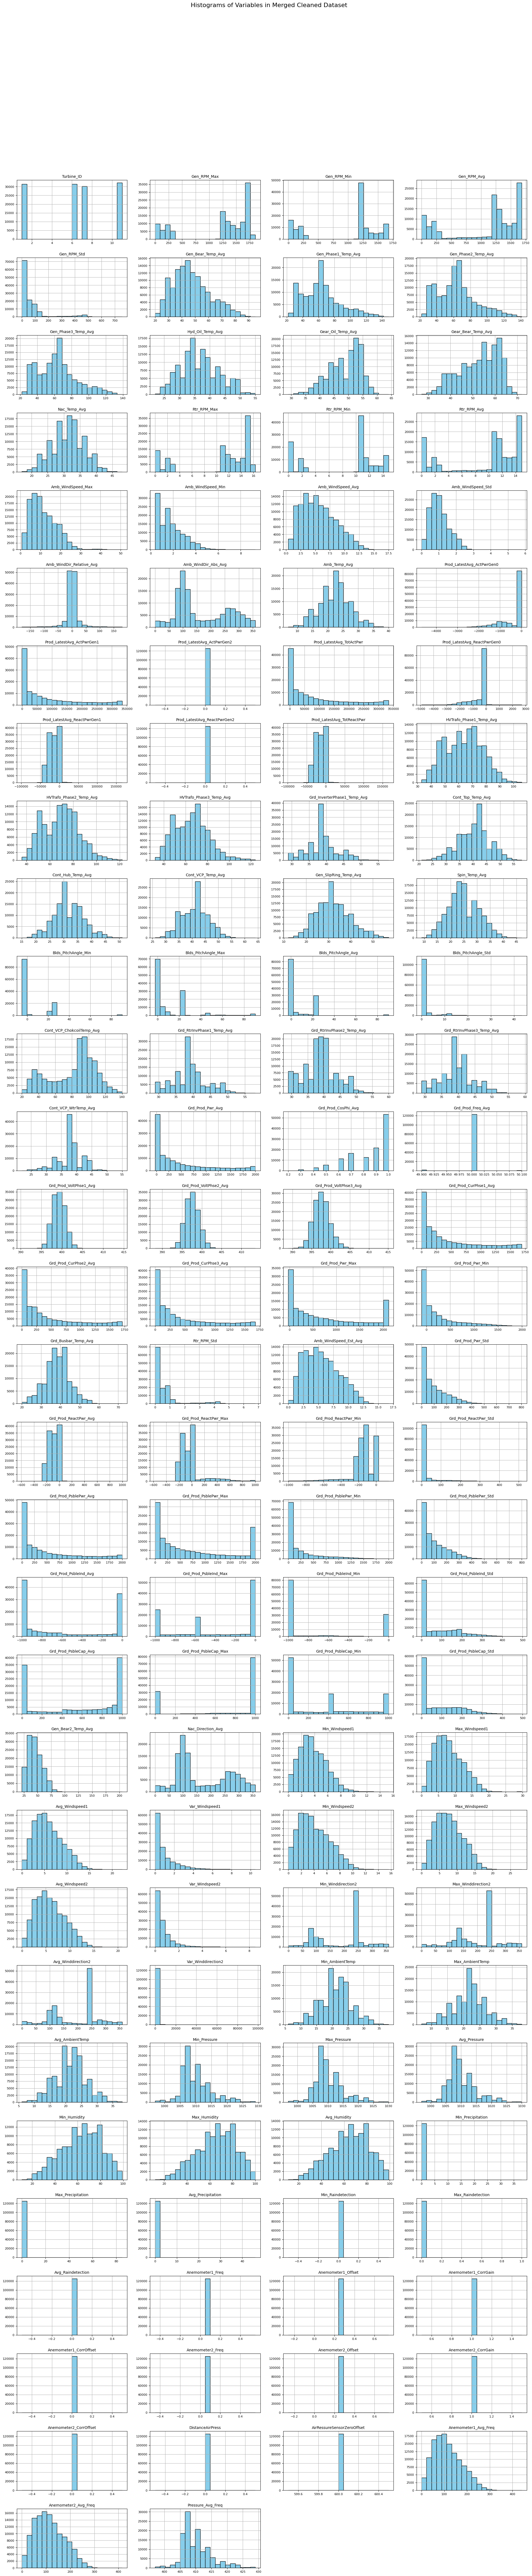

In [25]:
#Select numeric variables for plotting
variables = df_merged.select_dtypes(include=['float64', 'int64']).columns

#Plotting
n_vars = len(variables)
ncols = 4 
nrows = (n_vars + ncols - 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*3))
fig.tight_layout(pad=3.0)

axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    # Check for and drop NA values for a clean histogram
    df_merged[var].dropna().hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(var, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

for j in range(i+1, nrows*ncols):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.95)
plt.suptitle('Histograms of Variables in Merged Cleaned Dataset', fontsize=16, y=1.02)
plt.show()

In [26]:
#A new statistical summary for merged dataset after outlier cleaning
statistical_summary = df_merged.describe()

full_statistical_summary = df_merged.describe(include='all')

print(statistical_summary)


          Turbine_ID    Gen_RPM_Max    Gen_RPM_Min    Gen_RPM_Avg  \
count  125277.000000  125277.000000  125277.000000  125277.000000   
mean        6.273306    1202.801689     955.561935    1084.363933   
std         3.586609     610.088773     582.187829     588.340713   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000    1255.100000     217.300000     455.200000   
50%         6.000000    1412.400000    1228.400000    1269.300000   
75%        11.000000    1684.500000    1303.600000    1565.200000   
max        11.000000    1851.500000    1675.600000    1683.700000   

         Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
count  125277.000000      125277.000000        125277.000000   
mean       65.226247          47.118481            63.608931   
std       100.747922          13.817204            23.563934   
min         0.000000          20.000000            22.000000   
25%        12.100000          37.000000            46.0000

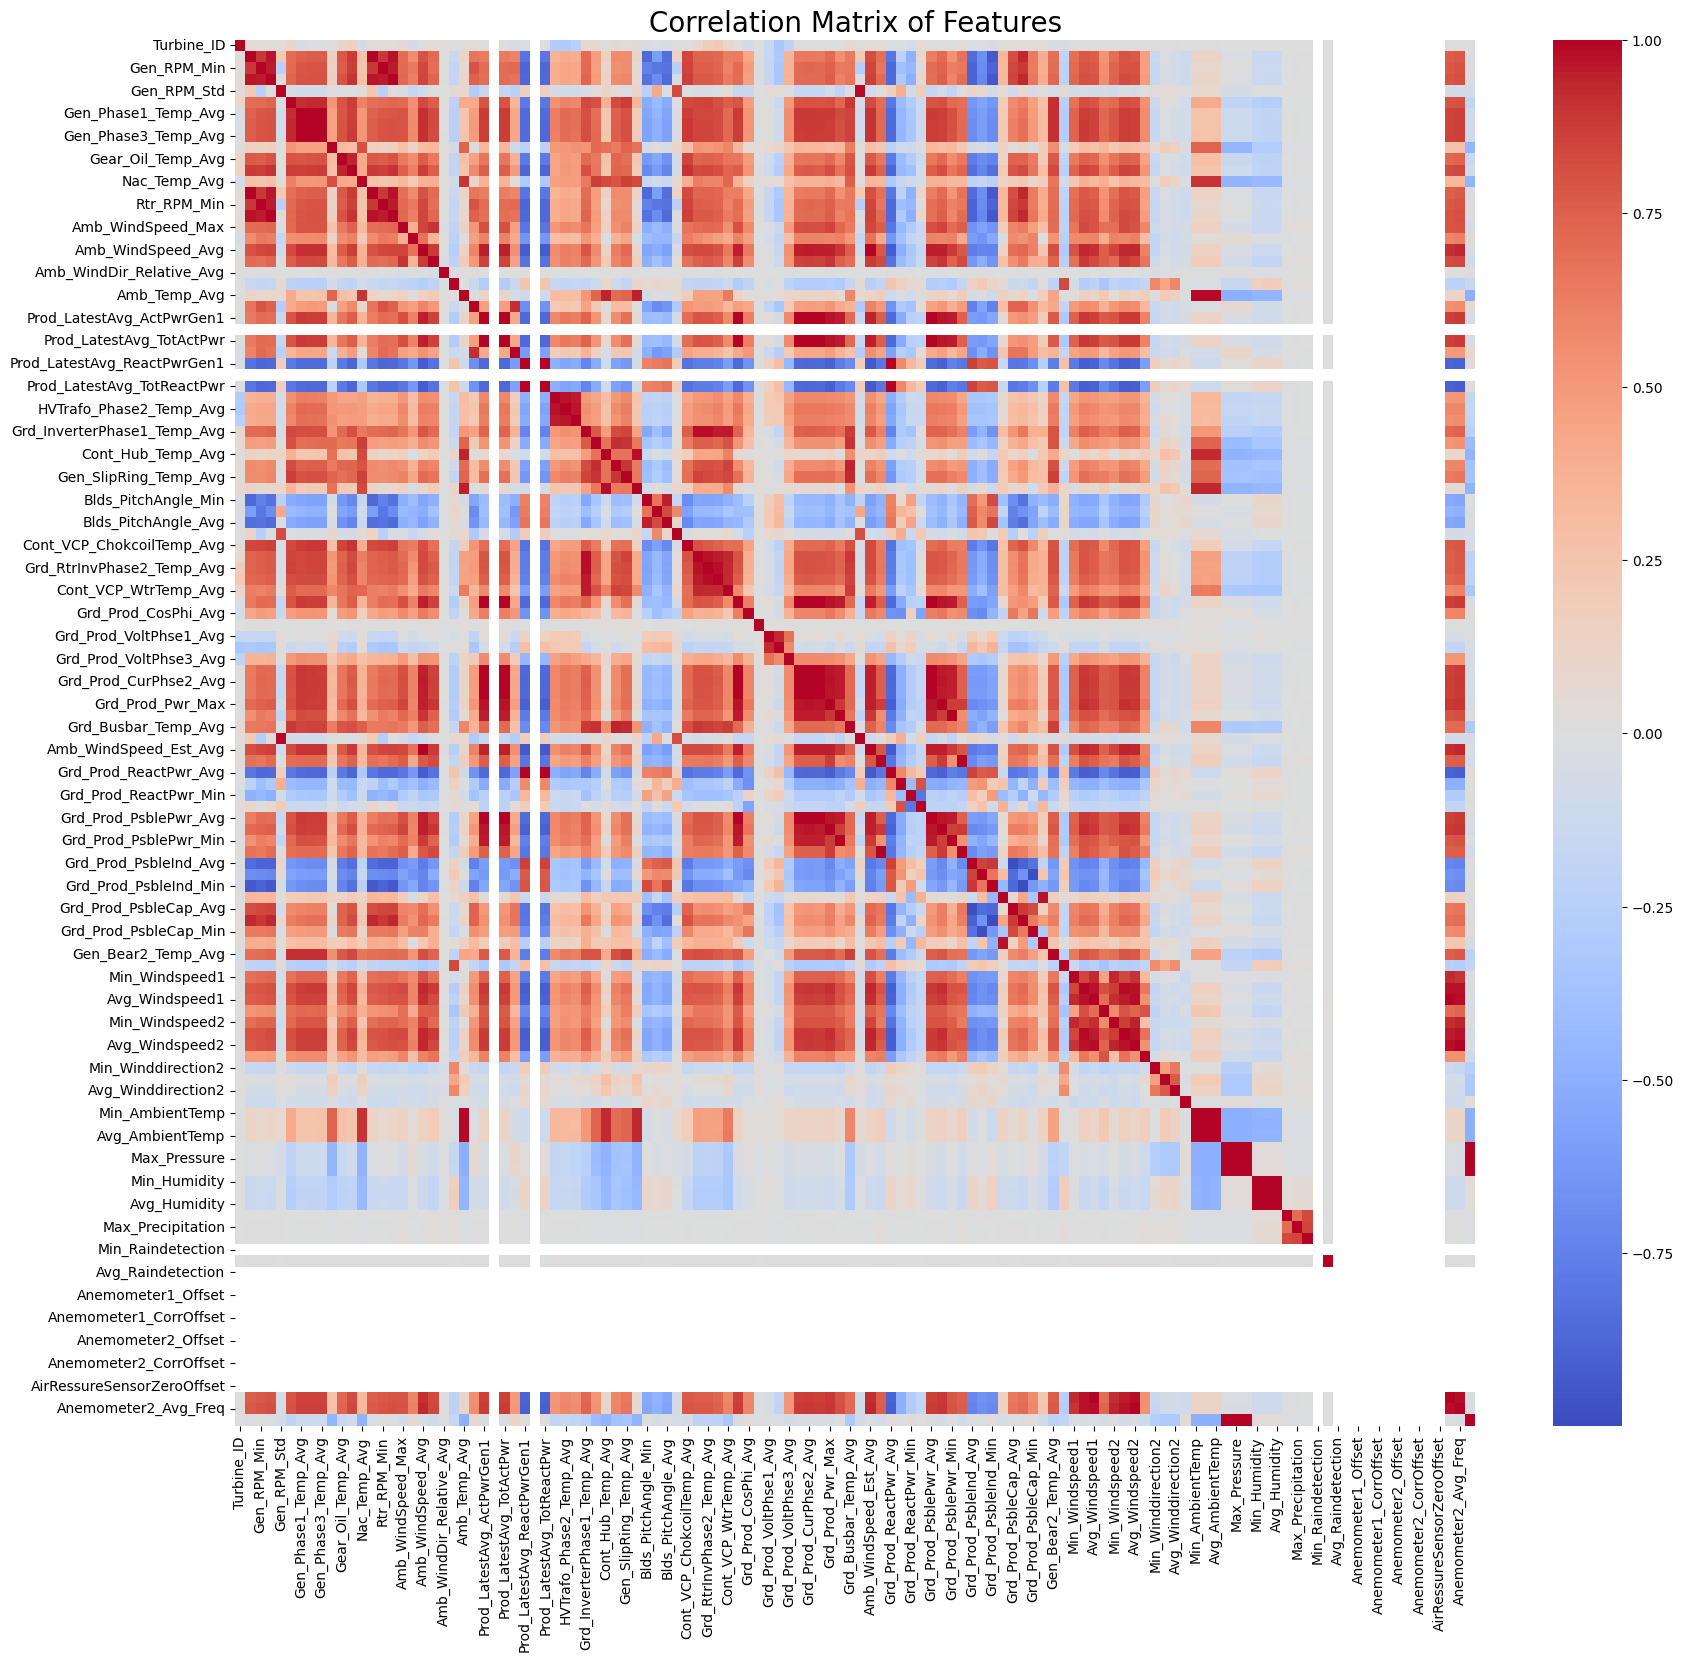

In [27]:
#Making the correlation matrix
numeric_features = df_merged.select_dtypes(include=[np.number])

correlation_matrix = numeric_features.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


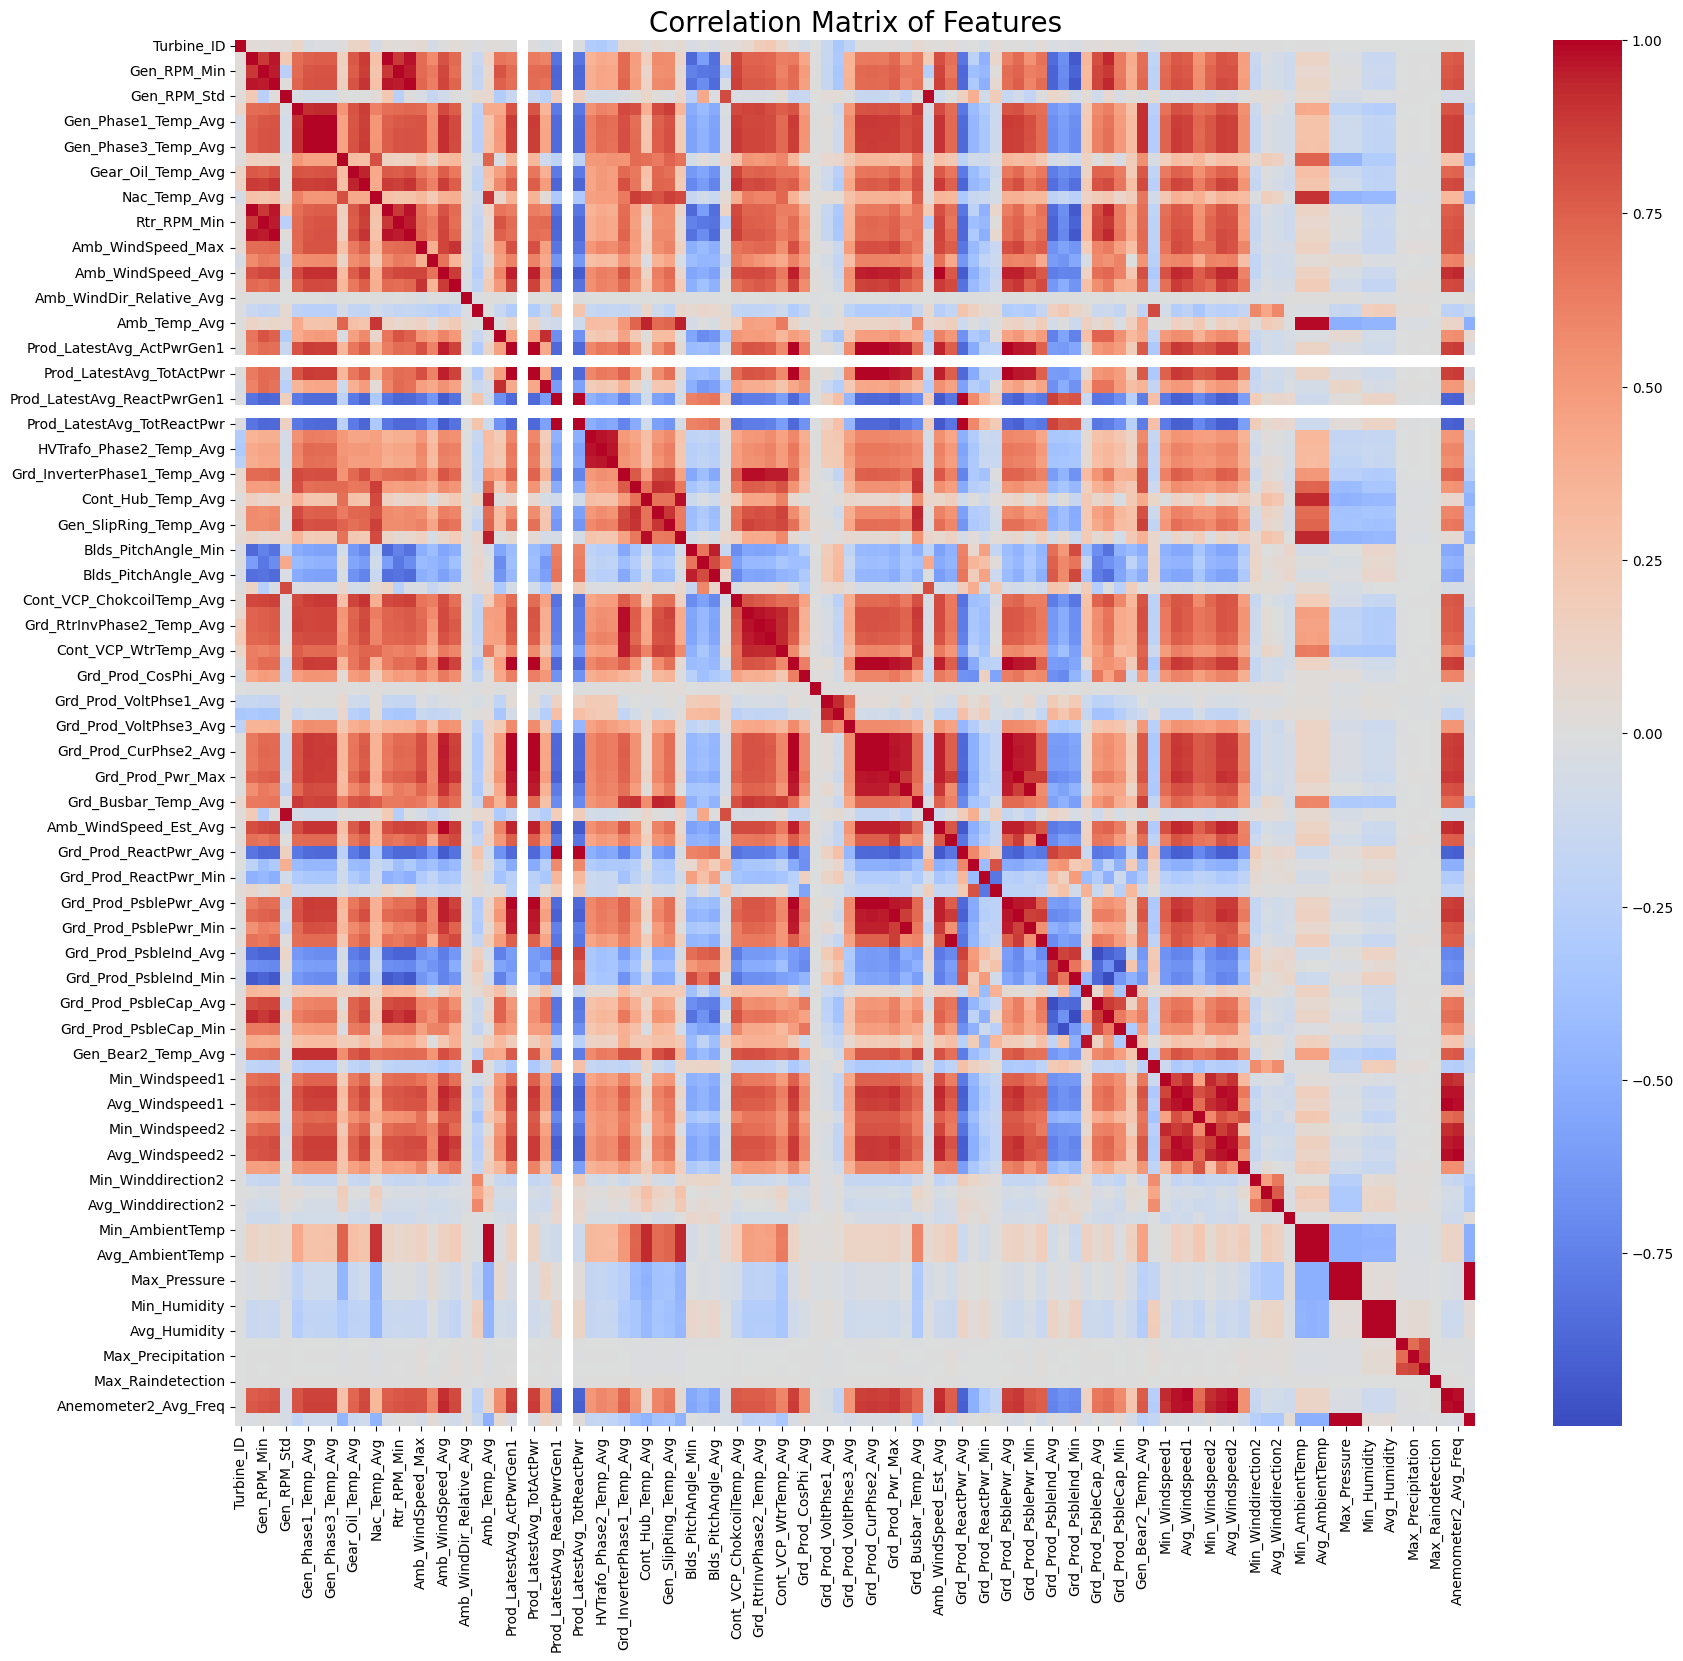

In [28]:
#Drop columns as they don't provide any valuable information and don't correlate with other data

columns_to_drop = [
    'Min_Raindetection','Avg_Raindetection', 'Anemometer1_Offset', 'Anemometer1_CorrOffset',
    'Anemometer2_Offset', 'Anemometer2_CorrOffset','AirRessureSensorZeroOffset', 
    'Anemometer1_CorrOffset', 'Anemometer2_CorrGain', 'DistanceAirPress', 'Anemometer1_CorrGain',
    'Anemometer2_Freq', 'Anemometer1_Freq', 'Anemometer2_CorrOffset'
    
]

#Dropping the columns from the DataFrame
df_merged = df_merged.drop(columns=columns_to_drop)

#Selecting numeric features for correlation analysis
numeric_features = df_merged.select_dtypes(include=[np.number])

correlation_matrix = numeric_features.corr()

#Plotting a new heatmap of the correlation matrix
plt.figure(figsize=(20, 18))  
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features', fontsize=20)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10) 
plt.show()

In [29]:
#Saving df_merged
df_merged.to_csv('/Users/katerinadenyakina/Desktop/Individual Project/datasets/df_merged.csv', index=False)